# Spaceship Titanic - Kaggle Competition
## Predict which passengers are transported to an alternate dimension

In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
df_train=pd.read_csv(r'C:\Users\ADMIN\Desktop\machine learning\Kaggle Competition\Spaceship Titanic\train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Xóa các cột không cần thiết
df_train.drop(columns=['PassengerId', 'Name'], inplace=True)

## Khám phá dữ liệu - EDA

In [4]:
# Check thông tin dữ liệu
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [5]:
# Thống kê mô tả dữ liệu
df_train.describe(include='all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693
unique,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True
freq,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,4378
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN


=> Với các cột categorical, phần lớn chỉ có 2-3 giá trị khác nhau trong cột, tuy nhiên cột Cabin có rất nhiều giá trị khác nhau.

=> với các cột numerical, chủ yếu là về chi phí dịch vụ sử dụng trong suốt chuyến đi. Giữa các cột có sự chênh lệch khá lớn giữa min, max và mean, cho thấy dữ liệu có thể có phân phối lệch và xuất hiện outliers

In [6]:
# Check giá trị thiếu (missing value)
df_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

=> Tất cả các cột (ngoại trừ cột Transported) đều có missing values

In [7]:
# Phân chia các cột dạng phân loại và dạng số
cat_cols=df_train.select_dtypes(include='object') # Cột dạng phân loại
num_cols=df_train.select_dtypes(exclude='object') # Cột dạng số

print(cat_cols.columns)
print(num_cols.columns)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


In [70]:
# Check outliers ở các cột numerical (ngoại trừ cột Transported và Age)
for col in num_cols.drop(columns=['Transported', 'Age']).columns:
    q1=num_cols[col].quantile(0.25)
    q3=num_cols[col].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    higher_limit=q3+1.5*iqr
    outliers=len(num_cols.loc[(num_cols[col]<lower_limit) | (num_cols[col]>higher_limit)])
    print(f'Số lượng ouliers của cột {col}: {outliers}')

Số lượng ouliers của cột RoomService: 1861
Số lượng ouliers của cột FoodCourt: 1823
Số lượng ouliers của cột ShoppingMall: 1829
Số lượng ouliers của cột Spa: 1788
Số lượng ouliers của cột VRDeck: 1809


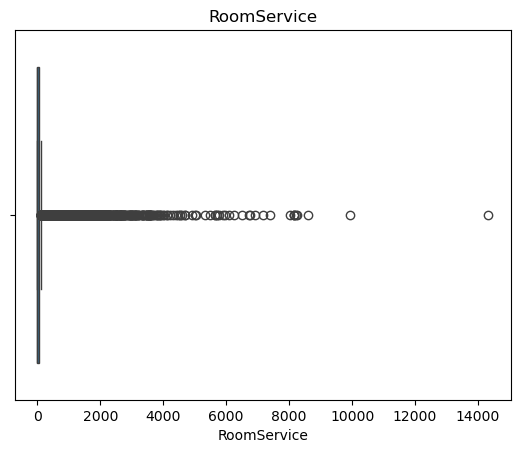

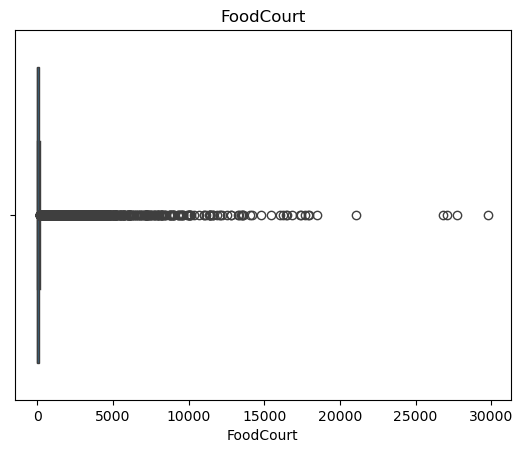

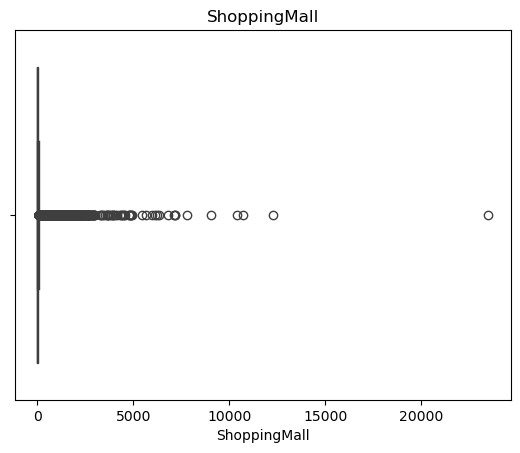

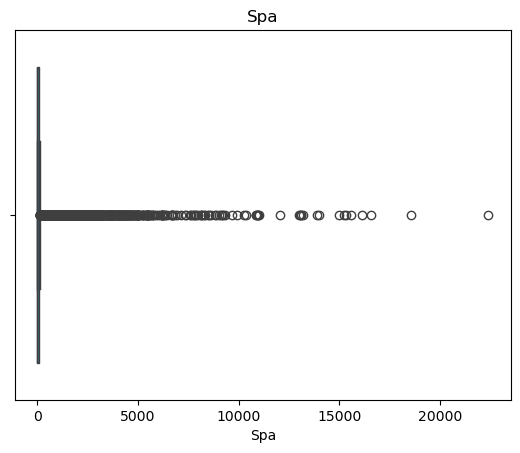

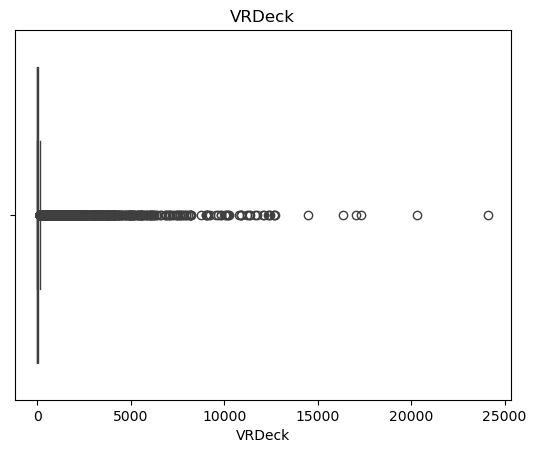

In [71]:
# Check outliers bằng biểu đồ boxplot
for col in num_cols.drop(columns=['Transported', 'Age']).columns:
    sns.boxplot(data=df_train, x=col)
    plt.title(col)
    plt.show()

=> Từ kết quả trên cho thấy có khá nhiều giá trị ngoại lai trong dữ liệu. Do đó sẽ cần phải xử lý outliers trước khi train

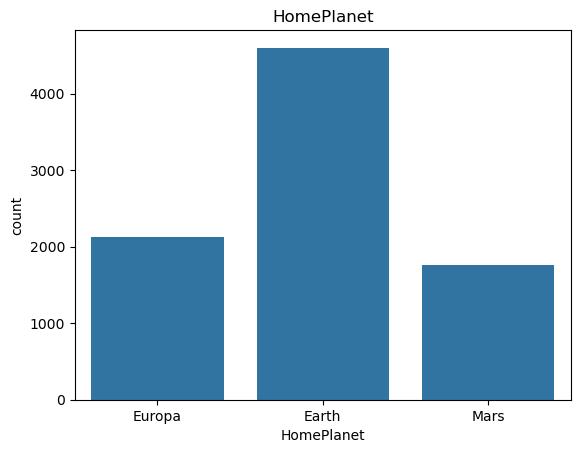

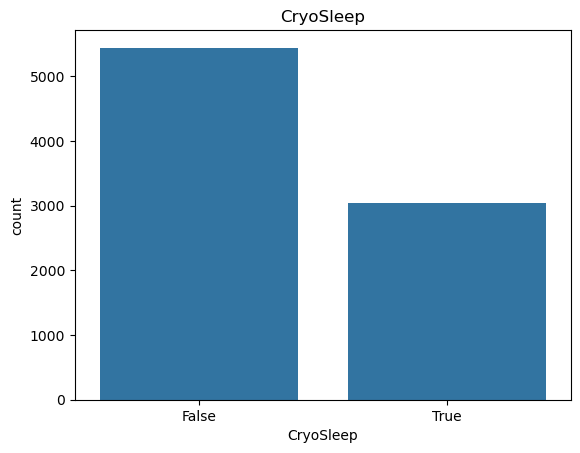

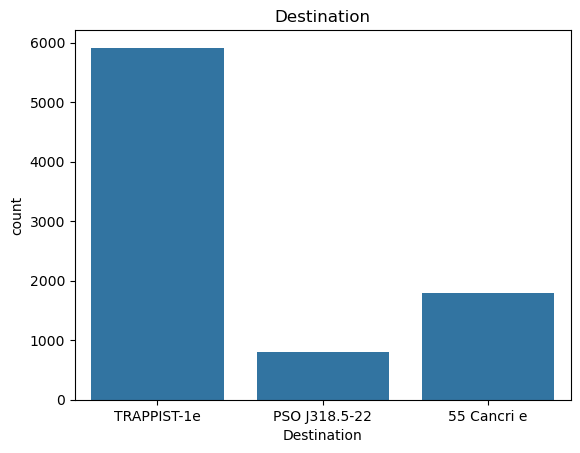

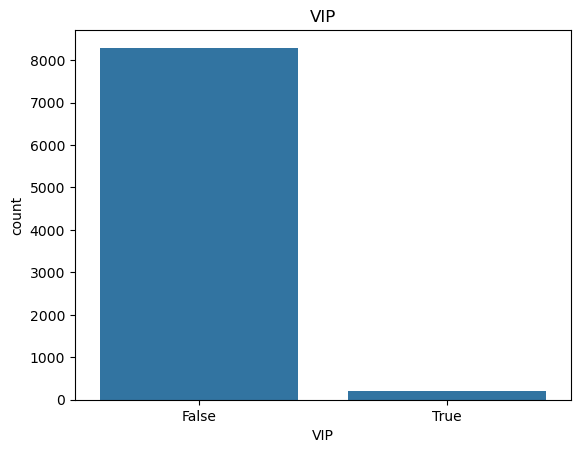

In [9]:
# Visualize dữ liệu categorical
# Vì cột Cabin có rất nhiều giá trị khác nhau nên sẽ không visualize cột đó
for col in cat_cols.drop(columns='Cabin').columns:
    sns.countplot(data=df_train, x=col)
    plt.title(col)
    plt.show()

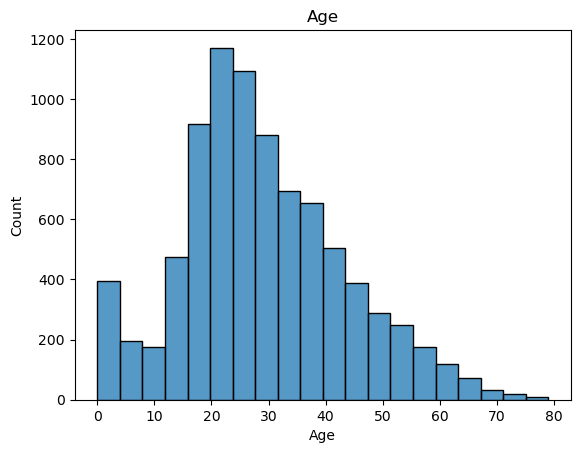

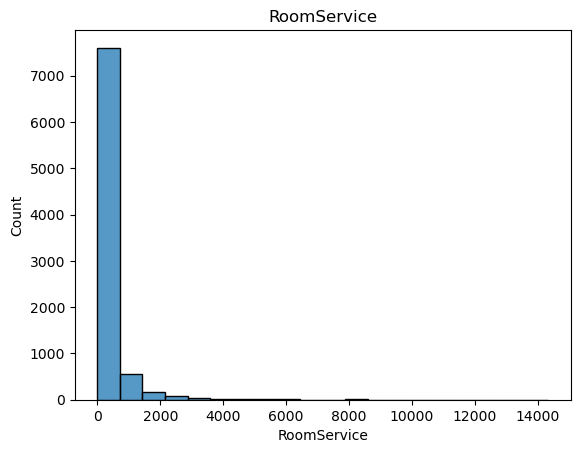

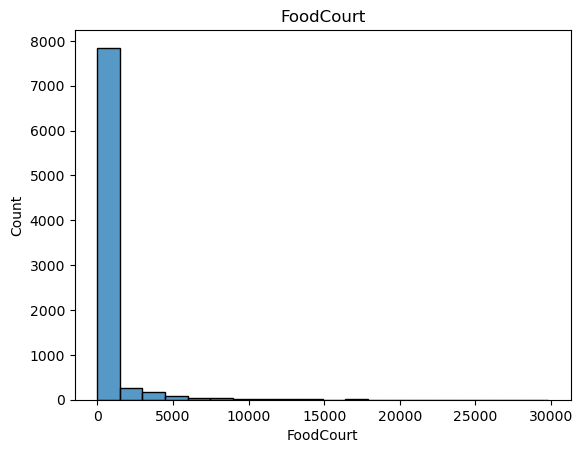

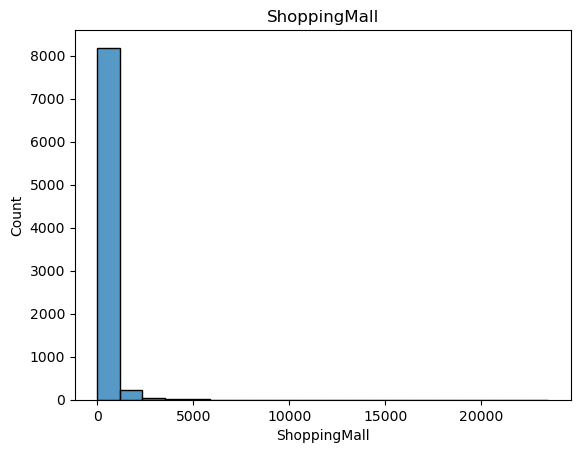

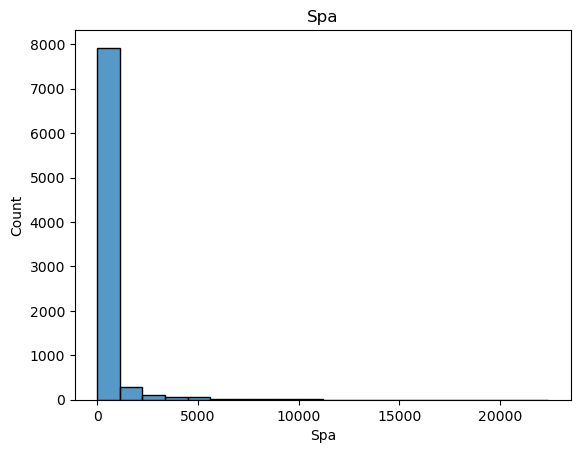

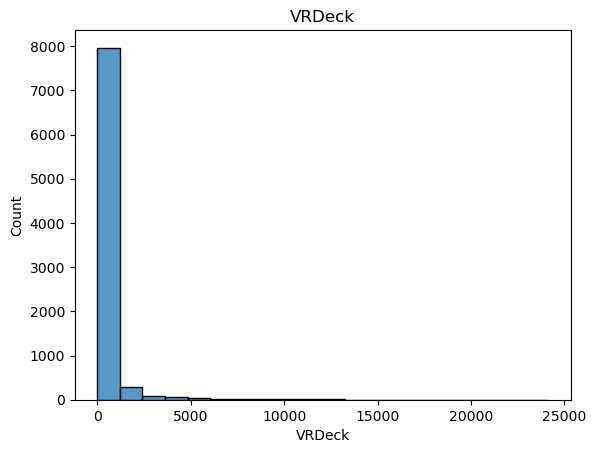

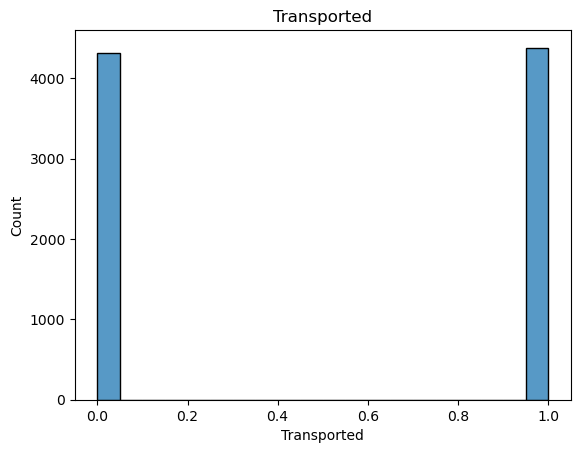

In [10]:
# Visualize dữ liệu numerical
for col in num_cols.columns:
    sns.histplot(data=df_train, x=col, bins=20)
    plt.title(col)
    plt.show()

## Ý tưởng train model

- Từ kết quả phân tích dữ liệu trên, có thể thấy dữ liệu cân bằng, do đó không cần phải thực hiện resampling data
- Vì dữ liệu ban đầu có cả missing values, outliers => Một số ideas về train model:
  1. Train model: LogisticRegression, SVM với data đã xử lý missing values và outliers, không feature scaling.
  2. Train model: LogisticRegression, SVM với data đã xử lý missing values và outliers, có feature scaling.
  3. Train model: RandomForest, XGBoost, LightGBM với data không xử lý missing values và outliers, không feature scaling.

## Xử lý missing values và outliers

In [11]:
# Tách 2 loại dữ liệu
df_train_pre=df_train.copy() # df_train_pre sẽ được dùng để thực hiện data preprocessing (handle missing values, outliers)

In [12]:
# Chia x y
x_pre=df_train_pre.drop(columns='Transported')
y_pre=df_train_pre['Transported']

x=df_train.drop(columns='Transported')
y=df_train['Transported']

In [13]:
# Xử lý missing values
from sklearn.impute import KNNImputer, SimpleImputer

# Xử lý missing value cho các cột numerical
knnimputer=KNNImputer(n_neighbors=5)
for col in num_cols.drop(columns='Transported').columns:
    x_pre[col]=knnimputer.fit_transform(x_pre[[col]])

# Xử lý missing values cho các cột categorical
simpleimputer=SimpleImputer(strategy='most_frequent')
for col in cat_cols.columns:
    x_pre[col]=simpleimputer.fit_transform(x_pre[[col]]).squeeze()

In [14]:
# Xử lý outliers cho các cột numerical
for col in num_cols.drop(columns=['Age','Transported']).columns:
    q1=x_pre[col].quantile(0.10)
    q3=x_pre[col].quantile(0.90)
    x_pre[col]=np.where(x_pre[col]>q3, q3, x_pre[col])
    x_pre[col]=np.where(x_pre[col]<q1, q1, x_pre[col])

## Encoding data

In [15]:
# Encoding data
from category_encoders import HashingEncoder
he=HashingEncoder(cols='Cabin')
x_pre_hash=he.fit_transform(x_pre)
x_pre_hash_dummy=pd.get_dummies(x_pre_hash, drop_first=True, dtype=int)

### 1. Train model: LogisticRegression, SVM với data đã xử lý missing values và outliers, không feature scaling.

In [16]:
# import thư viện
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [17]:
# Chia tập train-test
from sklearn.model_selection import train_test_split

x_train_pre, x_test_pre, y_train_pre, y_test_pre=train_test_split(x_pre_hash_dummy, y_pre, test_size=0.25, random_state=1)

              precision    recall  f1-score   support

       False       0.81      0.74      0.78      1058
        True       0.78      0.83      0.80      1116

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174

accuracy: 0.7902483900643974


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


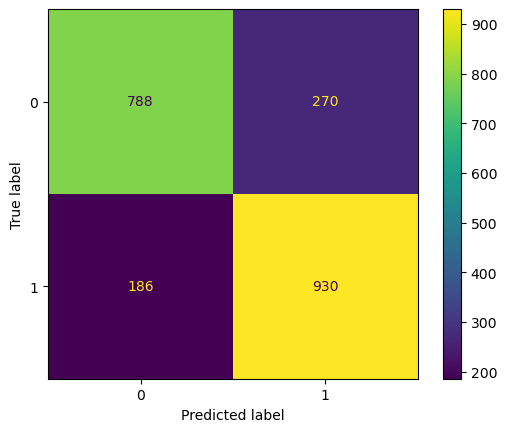

In [18]:
# Train với model LogisticRegression
log=LogisticRegression(random_state=1)
log.fit(x_train_pre, y_train_pre)
y_pred_log=log.predict(x_test_pre)
print(classification_report(y_test_pre, y_pred_log))
print('accuracy:', accuracy_score(y_test_pre, y_pred_log))
ConfusionMatrixDisplay(confusion_matrix(y_test_pre, y_pred_log)).plot()

              precision    recall  f1-score   support

       False       0.79      0.74      0.77      1058
        True       0.77      0.82      0.79      1116

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174

accuracy: 0.781508739650414


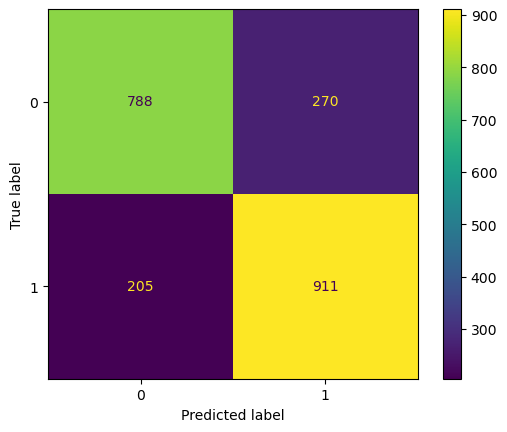

In [19]:
# Train với model SVM
svc=SVC(random_state=1)
svc.fit(x_train_pre, y_train_pre)
y_pred_svc=svc.predict(x_test_pre)
print(classification_report(y_test_pre, y_pred_svc))
print('accuracy:', accuracy_score(y_test_pre, y_pred_svc))
ConfusionMatrixDisplay(confusion_matrix(y_test_pre, y_pred_svc)).plot()

### 2. Train model: LogisticRegression, SVM với data đã xử lý missing values và outliers, có feature scaling.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_pre=scaler.fit_transform(x_train_pre)
x_test_pre=scaler.transform(x_test_pre)

              precision    recall  f1-score   support

       False       0.81      0.74      0.77      1058
        True       0.77      0.83      0.80      1116

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174

accuracy: 0.7884084636614536


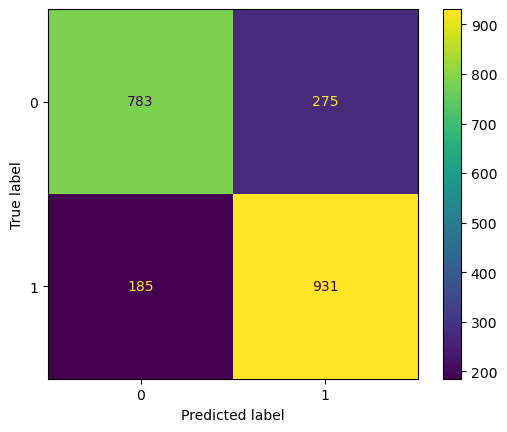

In [21]:
# Train với model LogisticRegression
log=LogisticRegression(random_state=1)
log.fit(x_train_pre, y_train_pre)
y_pred_log=log.predict(x_test_pre)
print(classification_report(y_test_pre, y_pred_log))
print('accuracy:', accuracy_score(y_test_pre, y_pred_log))
ConfusionMatrixDisplay(confusion_matrix(y_test_pre, y_pred_log)).plot()

              precision    recall  f1-score   support

       False       0.80      0.76      0.78      1058
        True       0.78      0.81      0.80      1116

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174

accuracy: 0.7874885004599816


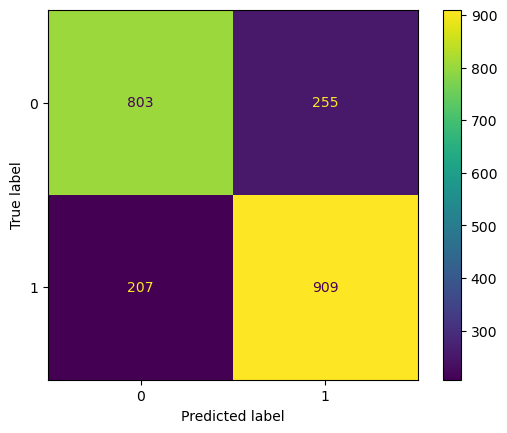

In [22]:
# Train với model SVM
svc=SVC(random_state=1)
svc.fit(x_train_pre, y_train_pre)
y_pred_svc=svc.predict(x_test_pre)
print(classification_report(y_test_pre, y_pred_svc))
print('accuracy:', accuracy_score(y_test_pre, y_pred_svc))
ConfusionMatrixDisplay(confusion_matrix(y_test_pre, y_pred_svc)).plot()

### 3. Train model: RandomForest, XGBoost với data không xử lý missing values và outliers, không feature scaling.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [24]:
# Encoding data

x_hash=he.fit_transform(x)
x_hash_dummy=pd.get_dummies(x_hash, drop_first=True, dtype=int)

In [25]:
# Chia tập train-test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x_hash_dummy, y, test_size=0.25, random_state=1)

              precision    recall  f1-score   support

       False       0.75      0.82      0.78      1058
        True       0.81      0.74      0.78      1116

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174

accuracy: 0.781048758049678


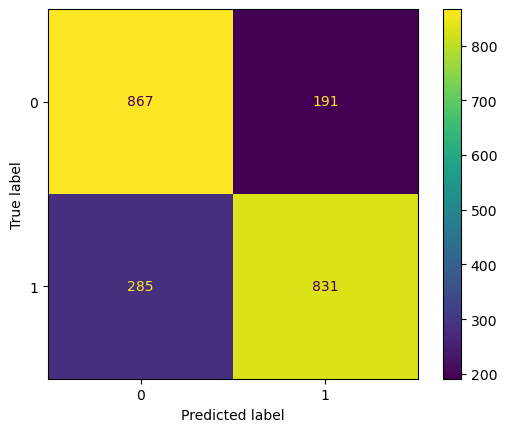

In [26]:
# Train với model RandomForest
rfc=RandomForestClassifier(random_state=1)
rfc.fit(x_train, y_train)
y_pred_rfc=rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))
print('accuracy:', accuracy_score(y_test, y_pred_rfc))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rfc)).plot()

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Number of positive: 3262, number of negative: 3257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 6519, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500383 -> initscore=0.001534
[LightGBM] [Info] Start training from score 0.001534
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
              precision    recall  f1-score

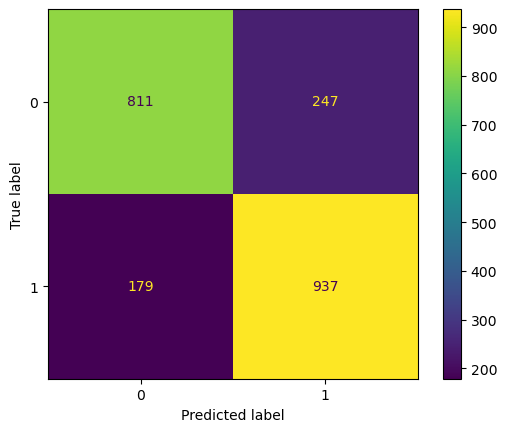

In [36]:
# Train với model LightGBM
lgbm=LGBMClassifier(random_state=1, boosting='dart')
lgbm.fit(x_train, y_train)
y_pred_lgbm=lgbm.predict(x_test)
print(classification_report(y_test,y_pred_lgbm))
print('accuracy:', accuracy_score(y_test, y_pred_lgbm))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lgbm)).plot()

              precision    recall  f1-score   support

       False       0.78      0.78      0.78      1058
        True       0.79      0.79      0.79      1116

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174

accuracy: 0.7861085556577737


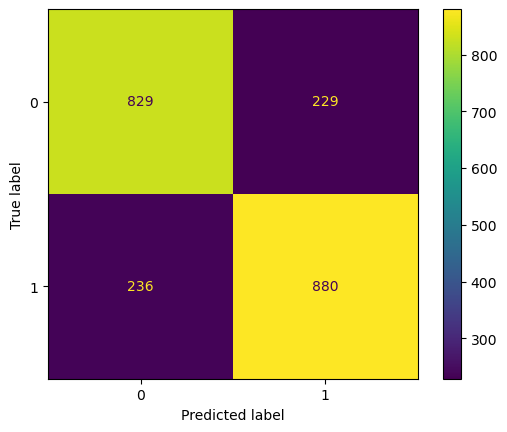

In [28]:
# Train với model XGBoost
xgbc=XGBClassifier(random_state=1)
xgbc.fit(x_train, y_train)
y_pred_xgbc=xgbc.predict(x_test)
print(classification_report(y_test, y_pred_xgbc))
print('accuracy:', accuracy_score(y_test, y_pred_xgbc))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgbc)).plot()

## Tổng hợp kết quả:
- LogisticRegression với no scaling: 0.7902483900643974
- LogisticRegression với scaling: 0.7884084636614536
- SVM với no scaling: 0.781508739650414
- SVM với scaling: 0.7874885004599816
- RandomForest: 0.781048758049678
- LightGBM: 0.8040478380864765
- XGBoost: 0.7861085556577737

=> **Lựa chọn LightGBM để Hyperparameter tuning**

## Hyperparameter tuning

In [56]:
# Bayes Search
from skopt import BayesSearchCV, space
from sklearn.model_selection import KFold

space={'learning_rate': space.Real(0.001, 0.5, prior='log-uniform'),
       'max_bin': space.Integer(100,300),
       'max_depth': space.Integer(10, 100),
       'feature_fraction': space.Real(0.1, 1),
       'bagging_fraction': space.Real(0.1, 1),
       'bagging_freq': space.Integer(0,10),
       'num_leaves': space.Integer(10, 100)}


bay_search=BayesSearchCV(estimator=lgbm, search_spaces=space, n_iter=100, n_jobs=-1, scoring='accuracy', random_state=1)
model=bay_search.fit(x_train, y_train)
print(model.best_params_)
print(model.best_score_)

y_pred_search=bay_search.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_search))

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.8851688838486558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8851688838486558
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.8851688838486558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8851688838486558
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsamp

In [67]:
# Save parameters
import joblib
joblib.dump(bay_search, 'optimized.pkl') # Lưu parameters
loaded_bay_search = joblib.load('optimized.pkl') # Load lại parameters

## Test kết quả

In [47]:
df_test=pd.read_csv(r'C:\Users\ADMIN\Desktop\machine learning\Kaggle Competition\Spaceship Titanic\test.csv')
id_submit=df_test['PassengerId']
df_test.drop(columns=['PassengerId', 'Name'], inplace=True)

In [49]:
# Encoding data
df_test_hash=he.transform(df_test)
df_test_hash_dummy=pd.get_dummies(df_test_hash, drop_first=True, dtype=int)

In [57]:
# Dự đoán và in kết quả
y_submit=bay_search.predict(df_test_hash_dummy)
submit_result=pd.DataFrame({'PassengerId':id_submit, 'Transported':y_submit})
submit_result.to_csv('spaceship_titanic_1.csv', index=False)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.8851688838486558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8851688838486558
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
